First we import the libraries that are needed for processing the data. We import numpy, pandas for the processing and matplotlib and seaborn for graphical representation. We have also imported the scikit learn library to perform any prediction or feature engineering tasks.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

Now we load the data into a pandas dataframe. We are importing employee data of an organisation to gain insights about the reasons of attrition by the employees to help improve the culture and employee retention of the company.

In [168]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Let's have a look at the data.

In [169]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Now let's see what all columns are available in the dataframe and the type of data  they contain.

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Firstly let's see if there is a need to clean the data due to mistakes in collecting data.

In [171]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let's change the values of column Attrition from "YES" and "NO" to True and False which will help in our analysis in the future.

In [172]:
category_mapping = {"Yes" : True, "No" : False}

In [173]:
df['Attrition'].replace(category_mapping, inplace=True)

In [174]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


We also remove some of the columns due to lack of domain knowledge and understanding of the data those columns represent or because of lack of significant variance in that column.

In [175]:
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate', 'Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

Now we lets see the dataframe and  data types of all our columns again for better understanding. we also remove the limit on the maximum number of rows and columns that can be displayed.

In [176]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [177]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


From this we find the data type of our columns is as follows : <br><br>
Numerical : Age, DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, <br>
            YearsAtCompany, YearsInCurrentRole <br><br>
Categorical : Attrition, BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel,<br>
                JobRole, JobSatisfaction, MaritalStatus, NumCompaniesWorked, Overtime, StockOptionLevel, PerformanceRating <br>
                 RelationshipSatisfaction, WorkLifeBalance<br><br>
Mixed : TrainingTimesLastYear, YearsSinceLastPromotion,YearsWithCurrManager

# Univariate Analysis

We start our univariate analysis by working with the numerical columns of our dataset. We will first start by using the descibe function the numerical columns and plotting boxplots of the columns. For this we will make a separate dataframe for the numerical columns.

In [198]:
numerical_df = df[['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']]

In [201]:
numerical_df.describe()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293,15.209524,11.279592,7.008163,4.229252
std,9.135373,8.106864,4707.956783,3.659938,7.780782,6.126525,3.623137
min,18.000000,1.000000,1009.000000,11.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2911.000000,12.000000,6.000000,3.000000,2.000000
50%,36.000000,7.000000,4919.000000,14.000000,10.000000,5.000000,3.000000
75%,43.000000,14.000000,8379.000000,18.000000,15.000000,9.000000,7.000000
max,60.000000,29.000000,19999.000000,25.000000,40.000000,40.000000,18.000000


Now let's start our multi-variate analysis by checking how the probability of attrition changes with the age of the employees. We will also consider the gender of the employee for our analysis.

Here we have taken a dataframe containing all the 3 columns that we want to analyze.

In [178]:
temp_df = df[['Age', 'Gender', 'Attrition']]
temp_df.head()

,Age,Gender,Attrition
0,41,Female,True
1,49,Male,False
2,37,Male,True
3,33,Female,False
4,27,Male,False


Splitting into data of male and female employees

In [179]:
condition = df['Gender'] == 'Male'

In [180]:
male_age_based_df = temp_df[condition]
female_age_based_df = temp_df[~condition]

In [181]:
male_age_based_df.drop(['Gender'], axis=1, inplace=True)
female_age_based_df.drop(['Gender'], axis=1, inplace=True)

C:\Users\shour\AppData\Local\Temp\ipykernel_9128\641429845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_age_based_df.drop(['Gender'], axis=1, inplace=True)
C:\Users\shour\AppData\Local\Temp\ipykernel_9128\641429845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_age_based_df.drop(['Gender'], axis=1, inplace=True)


In [182]:
male_age_based_df = male_age_based_df.sort_values(by='Age', ascending=True)
female_age_based_df = female_age_based_df.sort_values(by='Age', ascending=True)

In [183]:
male_ratio_by_age = male_age_based_df.groupby(by='Age').sum()['Attrition'] / male_age_based_df.groupby(by='Age').size()
female_ratio_by_age = female_age_based_df.groupby(by='Age').sum()['Attrition'] / female_age_based_df.groupby(by='Age').size()

Now we take a copy of dataframe with only the columns Age and Attriton

In [184]:
overall_age_based_df = df[['Age', 'Attrition']]

In [185]:
overall_age_based_df = overall_age_based_df.sort_values(by='Age', ascending=True)

In [186]:
ratio_by_age = overall_age_based_df.groupby(by='Age').sum()['Attrition'] / overall_age_based_df.groupby(by='Age').size()

Now we compare the number of attritions and ration of attrition by age combined and for each gender separately.

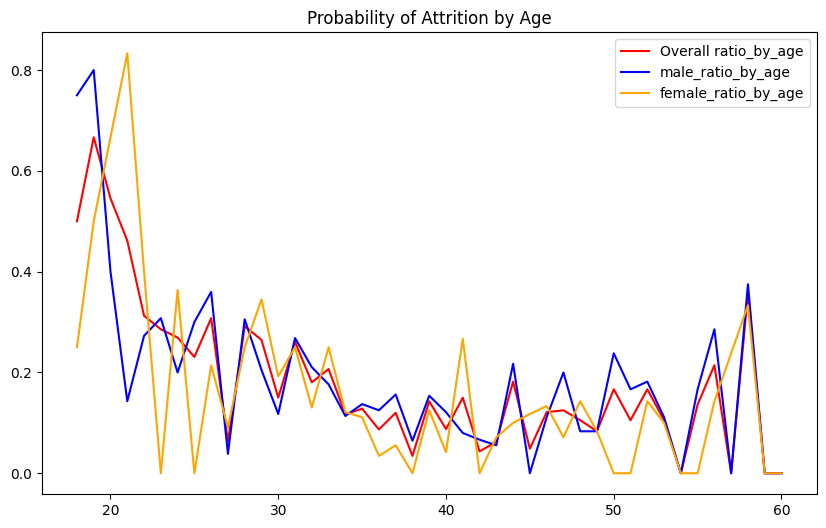

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(overall_age_based_df['Age'].unique(), ratio_by_age, c='r', label="Overall ratio_by_age")
plt.plot(male_age_based_df['Age'].unique(), male_ratio_by_age, c='b', label="male_ratio_by_age")
plt.plot(female_age_based_df['Age'].unique(), female_ratio_by_age, c='orange', label="female_ratio_by_age")
plt.title("Probability of Attrition by Age")
plt.legend();

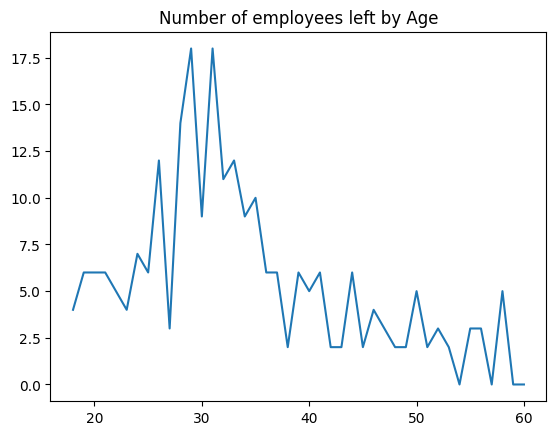

In [194]:
plt.plot(overall_age_based_df['Age'].unique(), overall_age_based_df.groupby(by='Age').sum()['Attrition'])
plt.title("Number of employees left by Age");